# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [8]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')
print(data.columns)


Index(['Size', 'Price'], dtype='object')


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491
Koeficient: 100.20242970420861, Intercept: 1327.8396854838713


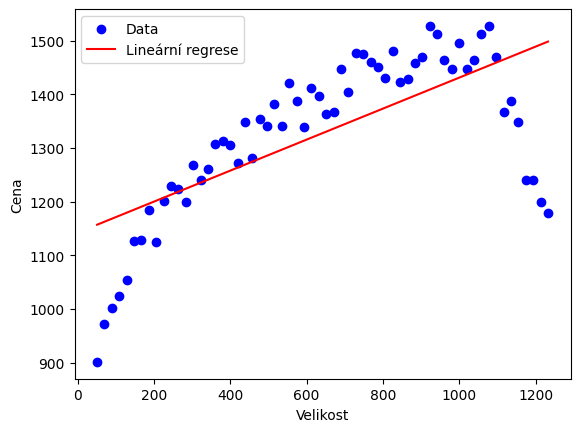

R2 lineárního modelu: 0.4640631587862314


In [9]:
# Prozkoumání dat
print(data.head())
X = data[['Size']].values
y = data['Price'].values

# Lineární model
## Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Vytvoření a natrénování lineárního modelu
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

## Zobrazení parametrů modelu
print(f'Koeficient: {lin_reg.coef_[0]}, Intercept: {lin_reg.intercept_}')

## Vizualizace lineárního modelu
y_pred = lin_reg.predict(X_scaled)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Lineární regrese')
plt.xlabel('Velikost')
plt.ylabel('Cena')
plt.legend()
plt.show()

## Hodnocení modelu
r2_lin = r2_score(y, y_pred)
print(f'R2 lineárního modelu: {r2_lin}')

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

Stupen 2, R2: 0.8807971039830393
Stupen 3, R2: 0.8961885817191735
Stupen 4, R2: 0.9535593659439079
Stupen 5, R2: 0.9549350934160249
Stupen 6, R2: 0.9560221107940496
Stupen 7, R2: 0.95692981937611
Stupen 8, R2: 0.9589246162068334


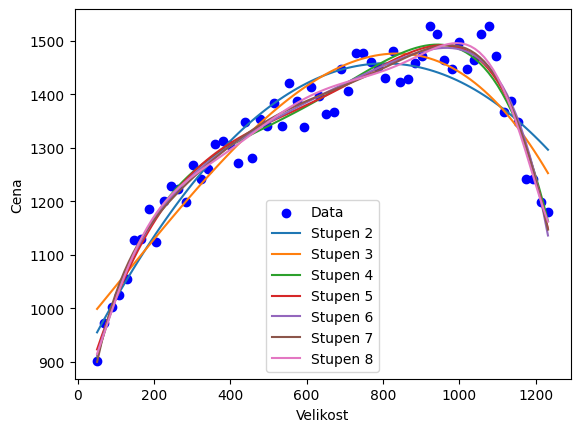

Nejlepší model: stupeň 8, R2: 0.9589246162068334


In [10]:

# Polynomiální modely se stupni 2 - 8
degrees = range(2, 9)
best_r2 = -np.inf
best_degree = 0

plt.scatter(X, y, color='blue', label='Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_scaled, y)
    y_poly_pred = model.predict(X_scaled)
    r2_poly = r2_score(y, y_poly_pred)
    
    print(f'Stupen {d}, R2: {r2_poly}')
    
    if r2_poly > best_r2:
        best_r2 = r2_poly
        best_degree = d
    
    # Vizualizace polynomiálních modelů
    y_poly_range_pred = model.predict(X_range_scaled)
    plt.plot(X_range, y_poly_range_pred, label=f'Stupen {d}')

plt.xlabel('Velikost')
plt.ylabel('Cena')
plt.legend()
plt.show()

print(f'Nejlepší model: stupeň {best_degree}, R2: {best_r2}')